# Анализ данных для крупного интернет-магазина

# Задача:

- Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

# Аббревиатуры:

## Структура hypothesis.csv:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

## Структура orders.csv:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

## Структура visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Оглавление:

[Часть 1: Приоритизация гипотез](#one)

[Шаг 1.1.: Загрузить данные и подготовить их к анализу](#two)

[Шаг 1.2.: ICE](#three)

[Шаг 1.2. RICE](#four)

[Часть 2. Маркетинговые метрики](#five)

[Шаг 2.1. Tочечные графики](#six)

[Шаг 2.2. Статистические значимости](#seven)

[Принять решение по результатам теста ](#eight)

[Общий вывод](#nine)

[Середина](#twenty)<a id= 'twentyone'></a>

[Вниз](#twentytwo)<a id= 'twentythree'></a>

<a id= 'one'></a>
# Часть 1.: Приоритизация гипотез

<a id= 'two'></a>
# Шаг 1.1.: Загрузить данные и подготовить их к анализу

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import math as mth
import datetime as dt
from scipy.stats import mannwhitneyu
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
orders = pd.read_csv('/datasets/orders.csv')

In [6]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
display(orders.info())
print(orders['date'].max())
print(orders['date'].min())
print()
print('Количество пропусков: {}'.format(orders.isna().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

2019-08-31
2019-08-01

Количество пропусков: transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [8]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [9]:
display(visitors.info())
print(visitors['date'].max())
print(visitors['date'].min())
print()
print('Количество пропусков: {}'.format(visitors.isna().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

2019-08-31
2019-08-01

Количество пропусков: date        0
group       0
visitors    0
dtype: int64


In [10]:
visitorsA = orders[orders['group'] == 'A']['visitorId']
visitorsB = orders[orders['group'] == 'B']['visitorId']
visitorsDup = pd.Series(np.intersect1d(visitorsA, visitorsB)) 
print('Всего {} пользователей, которые попали в обе группы'.format(len(visitorsDup)))

Всего 58 пользователей, которые попали в обе группы


In [11]:
print(orders.groupby('group').agg({'visitorId':'nunique'}))

       visitorId
group           
A            503
B            586


# Вывод

В таблицу orders обнаружились пользователи которые попали и тест А и в тест В. Я решил не удалять пользователей попавшие в обе группы, так как они не привышают и 5 процентов от общего числа. Они могут повлиять, если будут являться анномалиями в покупках или еще в каких то параметров, в дальнейшем я все равно буду фильтровать данных от выбросов, и даже если эти пользователи повадут, они уйдут.

<a id= 'three'></a>
# Шаг 1.2.: ICE

In [12]:
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round()

In [13]:
display(hypothesis)
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0


,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


При приоритизации гипотез: 
- "Запустить акцию, дающую скидку на товар в день рождения", 
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" 
оказались самыми легкими, но и эффективными при внедерении в меркетинговую компанию.

<a id= 'four'></a>
# Шаг 1.3.: RICE

In [14]:
hypothesis['RICE'] = (hypothesis ['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [15]:
display(hypothesis)
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0,16.2


,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Лучшими гипотезами оказались: 
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

# Вывод

Посчитав RICE и ICE, можно увидеть, что приоритизация гипотез разная. Происходит это все из за того, что RICE учитывает параметр REACH (охват), то есть для какого количества людей повлияет внедрение гипотезы. RICE является более точным параметром, но лучше судить исходя из ICE и RICE. Таким образом, "Запустить акцию, дающую скидку на товар в день рождения" гипотеза, которая была в топе в ICE не входит и 3ку в RICE, значит нужно смотреть на гипотезы которые вошли в обе таблицы. Исходя из этого, самые приоритетные гипотезы будут "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". Далее уже можно рассмотреть "Запустить акцию, дающую скидку на товар в день рождения" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", и так далее.

[Наверх](#twentyone)<a id= 'twenty'></a>

<a id= 'five'></a>
# Часть 2: Анализ A/B-теста


# График кумулятивной выручки

In [16]:
datesGroups = orders[['date','group']].drop_duplicates() 
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


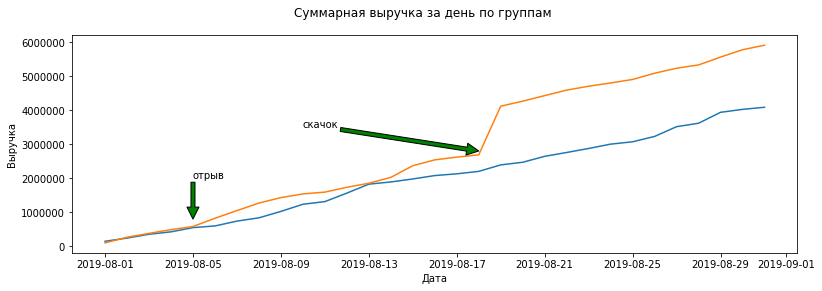

In [17]:
cumulativeData['date'] = cumulativeData['date'].astype('datetime64[D]')
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize = (13 ,4)) 

plt.suptitle('Суммарная выручка за день по группам')

plt.xlabel('Дата')

plt.ylabel('Выручка')

plt.annotate('скачок', xy=('2019-08-18', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.show() 

# Вывод

На графике видно, что оба графика растут примерно одинаково, но в августе в теста В присходит резкий скачек, и потом начинает дальше спокойно расти. Это может быть связанно с акциями, или удачном маркетинговой компанией, что привела к увелечению продаж у В.

# График кумулятивного среднего чека

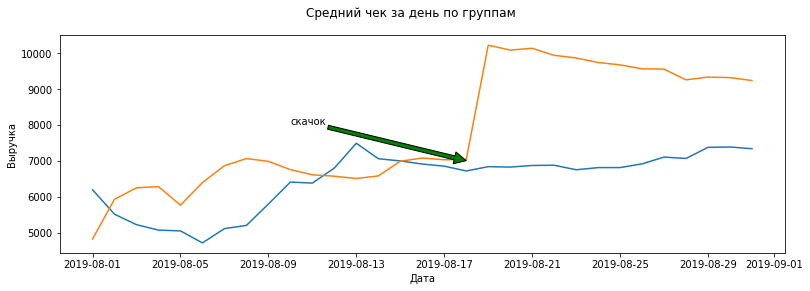

In [18]:
plt.figure(figsize = (13 ,4)) 

plt.suptitle('Средний чек за день по группам')

plt.xlabel('Дата')

plt.ylabel('Выручка')

plt.annotate('скачок', xy=('2019-08-18', 7000), xytext=('2019-08-10', 8000),
            arrowprops=dict(facecolor='g'))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.show() 

# Вывод

В начале, график сильно колеблится, но к концу после резкого взлета B становтся равномерным. Опять, можно наблюдать, как А и В примерно одинаковы, но после какого то проишествие выстреливает вверх. Нужно проанализировать этот момент аккуратней, и понять, если есть в данных какие то аномально большие заказы.

# График относительного изменения кумулятивного среднего чека

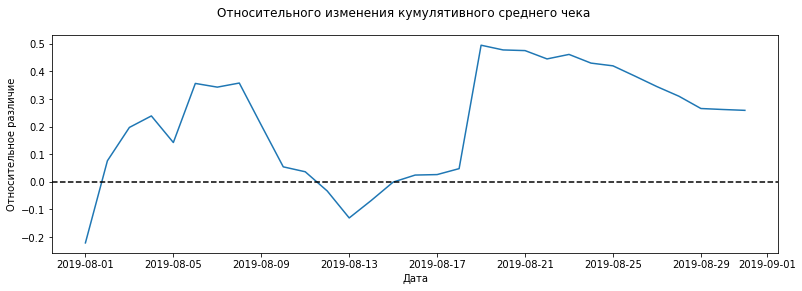

In [19]:
plt.figure(figsize = (13 ,4)) 

plt.suptitle('Oтносительного изменения кумулятивного среднего чека')

plt.xlabel('Дата')

plt.ylabel('Относительное различие')

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

# Вывод

График резко скачет, и за чего можно предположить, что и прям есть аномально большие заказы и выбросы.

# График кумулятивной конверсии по группам

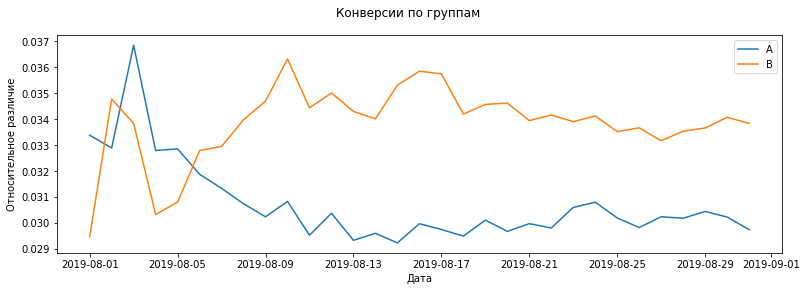

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize = (13 ,4)) 

plt.suptitle('Конверсии по группам')

plt.xlabel('Дата')

plt.ylabel('Относительное различие')

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.show()

# Вывод

Большая флуктуация данных в начале, но под конец данные стабилизировались. Конверсия у В все равно сильно выше чем и у А, хоть и был момент в начале, что А вырвалась вперед. В начале у А были лучше результаты, а в В хуже, но со временем А растет а В падает. Может есть в этом закономерность?

# График относительного изменения кумулятивной конверсии

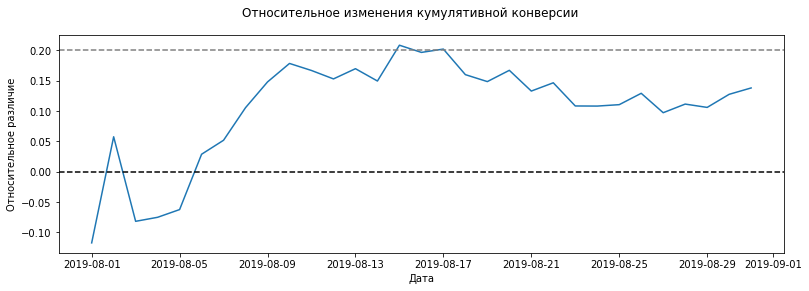

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (13 ,4)) 

plt.suptitle('Относительное изменения кумулятивной конверсии')

plt.xlabel('Дата')

plt.ylabel('Относительное различие')

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()


# Вывод

Сначала группа В проигравала А, но произошел резкий скачек, и группа В выравалась наверх. Рано говорить про какие либо выводы, нужно разобраться с аномалиями.

<a id= 'six'></a>
# Точечный график количества заказов по пользователям

In [22]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [23]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


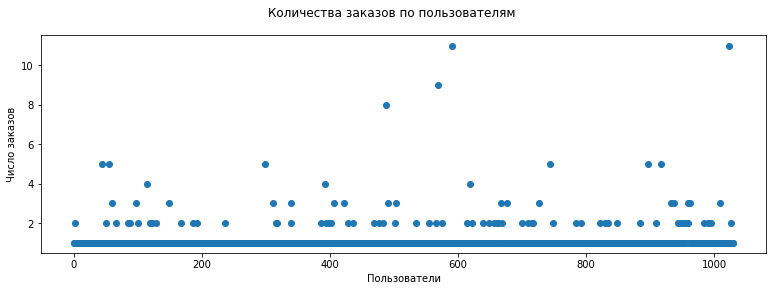

In [24]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))

plt.figure(figsize = (13 ,4)) 

plt.xlabel('Пользователи')

plt.ylabel('Число заказов')

plt.suptitle('Количества заказов по пользователям')

plt.scatter(x_values, ordersByUsers['orders'])

plt.show()

# Вывод

Из графика теперь наглядно видно, что впринципе многие совершают покупку один раз, но есть и много людей совершающие 2 покупки. К тому же, есть и большое количество заказов от 8 до 11. Пока не понятно, как к ним относиться, является ли это выбросом. Все зависит от специфики товара и услуг, может это оптовые заказы или это баг в системе. В люблм случае это единичные случаи, и то что они влияют на результаты АВ тестирования это точно.

# Посчитать 95-й и 99-й перцентили количества заказов на пользователя 

In [25]:
display(np.percentile(ordersByUsers['orders'], [95, 99])) 

array([2., 4.])

# Вывод

5% заказов составляет 2-3 заказа, и у только у одного процента 4 и более заказа. Таким образом, 95 процентов покупателей совершают только 1 покупку. Думаю разумно будет выбрать границу 3 или 4, так как 1% пользователей могут сильно повлиять на среднее.

# Точечный график стоимостей заказов

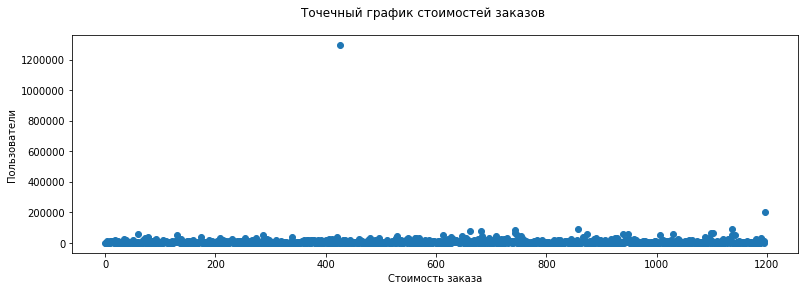

In [26]:
x_values = pd.Series(range(0,len(orders)))

plt.figure(figsize = (13 ,4)) 

plt.suptitle('Точечный график стоимостей заказов')

plt.xlabel('Стоимость заказа')

plt.ylabel('Пользователи')

plt.scatter(x_values, orders['revenue'])

plt.show()

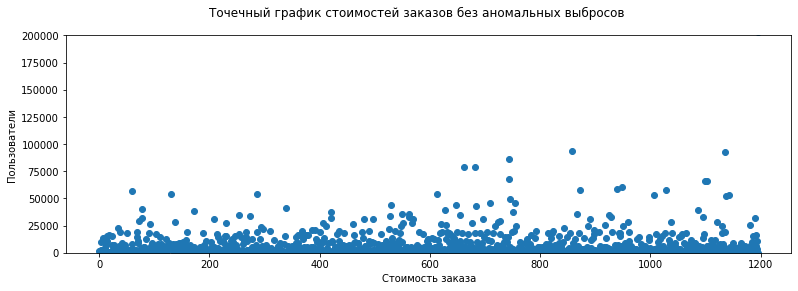

In [27]:
x_values = pd.Series(range(0,len(orders)))

plt.figure(figsize = (13 ,4)) 

plt.suptitle('Точечный график стоимостей заказов без аномальных выбросов')

plt.xlabel('Стоимость заказа')

plt.ylabel('Пользователи')

plt.scatter(x_values, orders['revenue'])

plt.ylim(0, 200000)

plt.show()

# Вывод

На графике сразу стало ясно почему произошел, такой аномальный рост, все из за огромного заказа на 1200000 ден.ед. Так же еще выбивается еще один заказ на 200000 ден.ед., что тоже может повлиять на результат. Таким образом, если обе эти покупки были в группе В, то это объсняет взрывной рост. Дополнительно, я сделал срез без аномально больших заказов, что бы увидеть картину без них. если смотреть на второй график, то там тоже есть выбросы на уровне примерно 100000, что тоже может повлиять на АВ тест.

# Посчитать 95-й и 99-й перцентили стоимости заказов

In [28]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


# Вывод

5 % людей покупают между 28000 и 58233.3, и 1% покпает более чем на 58233.2. Исходя из данных и графика, для граници с аномалиями можно выбрать 50000.

<a id= 'seven'></a>
# Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным

Гипотеза о равенстве конверсии между группами по «сырым» данным:
- H0 гипотеза - статистически значимых различий в конверсии между группами нет
- H1 гипотеза - статистически значимых различий в конверсии между группами есть

In [29]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [30]:
#orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']



In [32]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print("относительный выигрыш: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
относительный выигрыш: 0.138


In [33]:
sampleA


0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

# Вывод

Из данных можно увидеть, что p-value 0.017 меньше 0.05, таким образом отвергаем нулевую гипотезу. Значит, что различия есть. К тому же относительный выигрыш группы B равен 13.8%.

# Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Гипотеза о равенстве в среднем чеке между группами по «сырым» данным:
- H0 гипотеза - статистически значимых различий в среднем чеке между группами нет
- H1 гипотеза - статистически значимых различий в среднем чеке между группами есть

In [34]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


# Вывод

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.
Вообщем, различия серьезные, и по сырым данным, В по всем параметрам лучше А.


# Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Количество аномальных пользователей: {}'.format(abnormalUsers.shape))

1099     148427295
1137     759473111
949      887908475
744      888512513
1103    1164614297
dtype: int64
Количество аномальных пользователей: (21,)


Гипотеза о равенстве конверсии между группами по «очищенным» данным:
- H0 гипотеза - статистически значимых различий в конверсии между группами нет
- H1 гипотеза - статистически значимых различий в конверсии между группами есть

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [37]:

print('p-value: {0:.3f}'.format(mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('относительный выигрыш: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.012
относительный выигрыш: 0.160


# Вывод

При фильтрации данных, видно, что p-value уменьшился, а гипотеза осталась такая же. Таким образом, нулевую гипотезу опять отбрасываем. А относительный выйгрыш увеличился, что некоторые аномалии которые я исключил находились и в В группе.

# Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Гипотеза о равенстве в среднем чеке между группами по «очищенным» данным:
- H0 гипотеза - статистически значимых различий в среднем чеке между группами нет
- H1 гипотеза - статистически значимых различий в среднем чеке между группами есть

In [38]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers))
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative = 'two-sided'
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.715
0.032


# Вывод
p-value уменьшился, что значит гипотеза остаеться таже, но относительный выйгрыш среднего чека ощутимо уменьшился, что доказывает, что в группе в В были аномалии, которые искожали данные.

<a id= 'eight'></a>
# Принять решение по результатам теста 

Подводя итогя этого исследования, нужно начать с того, что анализируя графики видно, что данные успокоились и калебания прекратились. Также видно, что группа В значительно лучше группы А по всем параметрам, и только усугубилась разница после удалении аномалий. Учитывая все выше сказанное, не вижу смысла продолжать исследования, и зафиксировать группу В как победителя.

<a id= 'nine'></a>
# Общий вывод

Подводя итоги самостоятельного проекта, начну в приоритезации гипотез. Исследуя их с помощью ICE и RICE, я принял решение, что лучше всего следует интегрировать следующее:

•	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

•	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Во второй части проекта, я занимался анализом данных таблицы visitors и orders которые были результатом проводимого A/B-теста. В данных были обнаружены пользователи, которые попали в обе группы. На будущее нужно разобраться, как избежать такого в будущем. По графикам метрик, можно были увидеть, что были или аномально большие заказы или аномально много заказов. Такие вещи влияют на общие выводы о тестах. Далее, поняв их границы, я убрал их и приступил анализу сравнивая такие метрики как средний чек и конверсию по таблицам, где сырые данные и где очищенные данные. В общем оказалось, что, удаляя аномалии тест В все равно оказался успешней, чем тест А. Таким образом, я принял решение остановить тест и объявить В победителем


[Наверх](#twentythree)<a id= 'twentytwo'></a>